In [35]:
# # Data Cleaning & Preprocessing
# Dataset: Customer Personality Analysis  
# Goal:Clean, preprocess, and visualize data for further analysis


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data
file_path = r"C:\Users\deepshikha\Desktop\Customer analysis\marketing_campaign.csv"
df = pd.read_csv(file_path, sep="\t")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


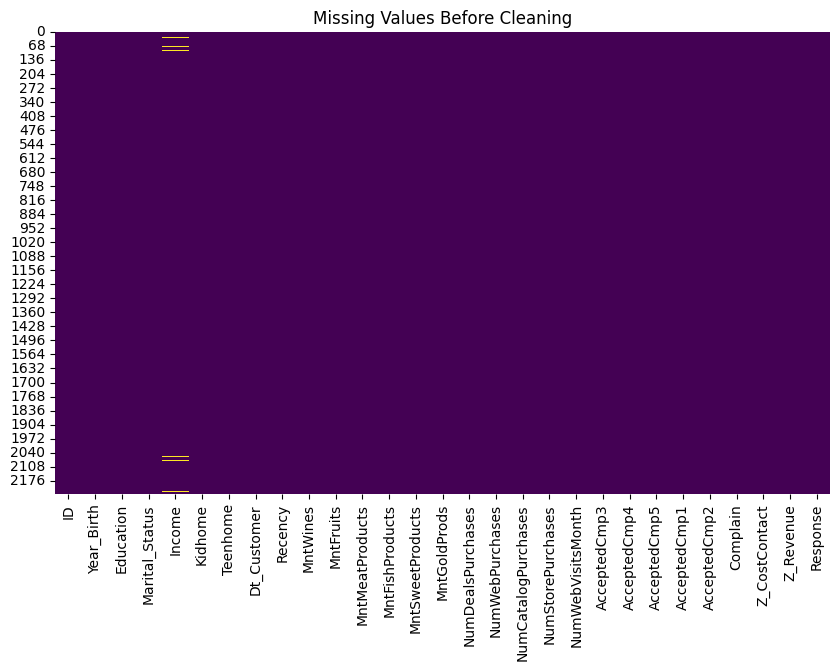

In [37]:
# Visualizing missing values before cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Before Cleaning")
plt.show()


In [38]:
# Dropping missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("Data shape after cleaning:", df.shape)


Data shape after cleaning: (2216, 29)


In [39]:
# Cleaning text columns (lowercase, strip)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# Converting date column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [40]:
# Renaming columns: lowercase, replace spaces

df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_", regex=False)
              .str.replace("__", "_", regex=False)
)


In [41]:
# Converting column types to best fit
df = df.convert_dtypes()
df.dtypes


id                              Int64
year_birth                      Int64
education              string[python]
marital_status         string[python]
income                          Int64
kidhome                         Int64
teenhome                        Int64
dt_customer            datetime64[ns]
recency                         Int64
mntwines                        Int64
mntfruits                       Int64
mntmeatproducts                 Int64
mntfishproducts                 Int64
mntsweetproducts                Int64
mntgoldprods                    Int64
numdealspurchases               Int64
numwebpurchases                 Int64
numcatalogpurchases             Int64
numstorepurchases               Int64
numwebvisitsmonth               Int64
acceptedcmp3                    Int64
acceptedcmp4                    Int64
acceptedcmp5                    Int64
acceptedcmp1                    Int64
acceptedcmp2                    Int64
complain                        Int64
z_costcontac

In [42]:
# Exploring categorical variables
for col in ['education', 'marital_status']:
    print(f"{col} → {df[col].unique()}")


education → <StringArray>
['graduation', 'phd', 'master', 'basic', '2n cycle']
Length: 5, dtype: string
marital_status → <StringArray>
['single', 'together', 'married', 'divorced', 'widow', 'alone', 'absurd',
 'yolo']
Length: 8, dtype: string


In [43]:
# Saving cleaned dataset
df.to_csv(r"C:\Users\deepshikha\Desktop\PROJECTS\archive\customer_personality_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'customer_personality_cleaned.csv'")


✅ Cleaned dataset saved as 'customer_personality_cleaned.csv'


 # Data Visualizations

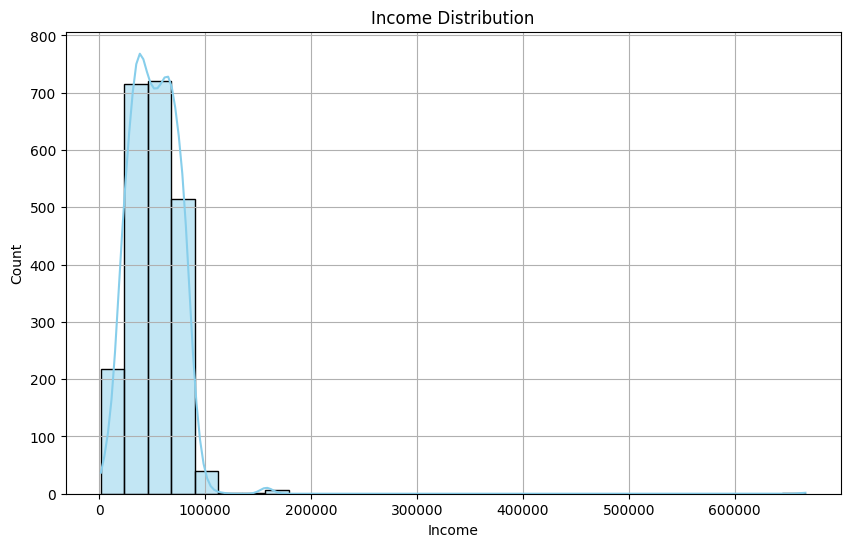

In [44]:
# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=30, kde=True, color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(True)
plt.show()


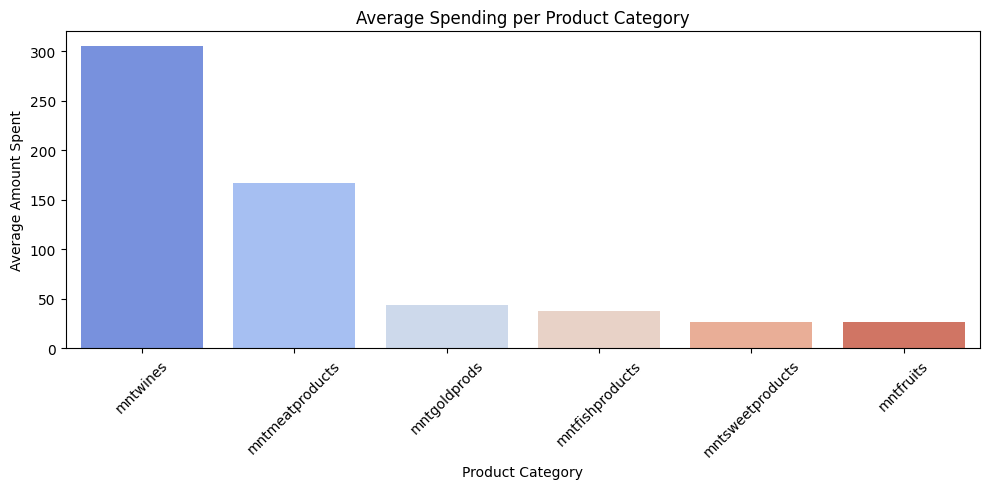

In [ ]:
# Average Spending per Product Category
product_cols = [
    'mntwines', 'mntfruits', 'mntmeatproducts',
    'mntfishproducts', 'mntsweetproducts', 'mntgoldprods'
]
avg_spending = df[product_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_spending.index, 
    y=avg_spending.values,
    hue=avg_spending.index,  # Added hue parameter
    palette='coolwarm',
    dodge=False,  # Prevents side-by-side bars
    legend=False  # Hides redundant legend
)
plt.title('Average Spending per Product Category')
plt.ylabel('Average Amount Spent')
plt.xlabel('Product Category')
plt.xticks(rotation=45)  # Added rotation for better readability
plt.tight_layout()  # Ensures labels fit properly
plt.show()